In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors

#import scvi
import anndata as ad

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

plt.rcParams['figure.figsize'] = (6, 6)

from IPython.core.display import display, HTML
import random

#Define a colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
#colorsComb = np.vstack([colors3, colors2])
#mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
from matplotlib import colors
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

# Helper function to split list in chunks
def chunks(lista, n):
    for i in range(0, len(lista), n):
        yield lista[i:i + n]
        
        plt.rcParams['figure.figsize'] = (6, 5)
sc.set_figure_params(dpi=100, vector_friendly=True)
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())
plt.rcParams['figure.figsize'] = (6, 5)
sc.set_figure_params(dpi=100, vector_friendly=True)
sc.settings.figdir = "./figures/"

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import scvi

Global seed set to 0


In [3]:
## frequently used variables
from matplotlib import colors
import matplotlib.pyplot as plt
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

## Along these Lines, a colourmap diverging from gray to red
gray_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N = 128)

## Some more Colour Maps
gray_violet = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "mediumvioletred", "indigo"], N = 128)
gray_blue = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "cornflowerblue", "darkblue"], N = 128)


def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())
#plt.rcParams['figure.figsize'] = (6, 5)
#sc.set_figure_params(dpi=120, vector_friendly=True)

In [4]:
import matplotlib.colors as colors
c_low = colors.colorConverter.to_rgba('orange', alpha = 0)
c_high = colors.colorConverter.to_rgba('red',alpha = 1)
cmap_transparent = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low, c_high], 512)

In [5]:
import matplotlib.colors as colors
c_low2 = colors.colorConverter.to_rgba('green', alpha = 0)
c_high2 = colors.colorConverter.to_rgba('darkblue',alpha = 1)
cmap_transparent2 = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low2, c_high2], 512)

In [6]:
#pip install git+https://github.com/scverse/squidpy@main

In [7]:
print(f"squidpy=={sq.__version__}")
print(f"scanpy=={sc.__version__}")

squidpy==1.2.3
scanpy==1.9.3


In [8]:
#!TMPDIR="$HOME"/.virtualenvs/scanpy-env-hpc/ "$HOME"/.virtualenvs/scanpy-env-hpc/bin/pip install --cache-dir="$HOME"/.virtualenvs/scanpy-env-hpc/ squidpy==1.2.2

In [9]:
#pip install git+https://github.com/BayraktarLab/cell2location.git#egg=cell2location[tutorials]

In [10]:
sys.path.append("/home/ramirefi/apps/scanpy_utils/")
from scanpy_utils import plot_utils
%run  /home/ramirefi/apps/scanpy_utils/utils.py

In [11]:
import cell2location as c2l
from cell2location.utils import select_slide

In [12]:
def plot_spatial_cm(adata_vis, gene,group, vmins, vcenters, vmaxs, img_keys, cmaps, palettes):
    import matplotlib.pyplot as plt
    from cell2location.utils import select_slide
    fig, (ax1, ax2, ax3, ax4, ax5,ax6) = plt.subplots(1, 6, figsize=(26,4), )
    plt.suptitle("                                                                          control                           ", y=1.05)
    with plt.rc_context({'axes.facecolor':  'white','figure.figsize': [4, 4]}):
        slide = select_slide(adata_vis, "90_C1_RO-730_Healthy_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax1, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "91_A1_RO-727_Healthy_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax2, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "91_B1_RO-728_Healthy_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax3, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "1217_0002_processed_aligned")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax4, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "92_A1_RO-3203_Healthy_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax5, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "1217_0004_processed_aligned")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax6, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        
    fig, (ax7, ax8, ax9, ax10, ax11,) = plt.subplots(1, 5, figsize=(22,4), )
    plt.suptitle("                                                                          IPF                           ", y=1.05)
    with plt.rc_context({'axes.facecolor':  'white','figure.figsize': [4, 4]}):
        slide = select_slide(adata_vis, "90_A1_H237762_IPF_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax7, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "1217_0001_processed_aligned")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax8, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "91_D1_24513-17_IPF_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax9, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "1217_0003_processed_aligned")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax10, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "92_D1_RO-3736_IPF_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax11, show=False,vcenter= vcenters,palette=palettes)
                

In [13]:
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes as inset_axes_func


def add_rectange_to_axis(ax, crop_coord, **kwargs):
    width = crop_coord[1] - crop_coord[0]
    height = crop_coord[2] - crop_coord[3]
    bottom_left = (crop_coord[0], crop_coord[3])
    
    kwargs = {'linewidth': 3,
             'edgecolor': 'r',
             'facecolor': 'none',
             'zorder': 10,
             **kwargs}
    
    rect = patches.Rectangle(bottom_left, width, height, **kwargs)
    ax.add_patch(rect)
    

def add_rectangle_to_fig(fig, crop_coord, **kwargs):
    for ax in fig.axes:
        if type(ax.get_aspect()) is str or ax.get_aspect() < 5:
            add_rectange_to_axis(ax, crop_coord, **kwargs)

# load data

In [14]:
##load
adata_vis = sc.read(f"human_7vis_4cyt_slides_combined_c2l_NMF.h5ad")

In [15]:
adata_vis

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'n_genes', 'leiden', 'leiden_15', 'leiden_2', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', '_indices', '_scvi_batch', '_scvi_labels', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'S

In [16]:
Niche_NMF_palette = dict(zip(adata_vis.obs.Niche_NMF.cat.categories, adata_vis.uns["Niche_NMF_colors"]))

In [17]:
cts = ['AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast',
       'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte',
       'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi',
       'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 
       'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 
       'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS']

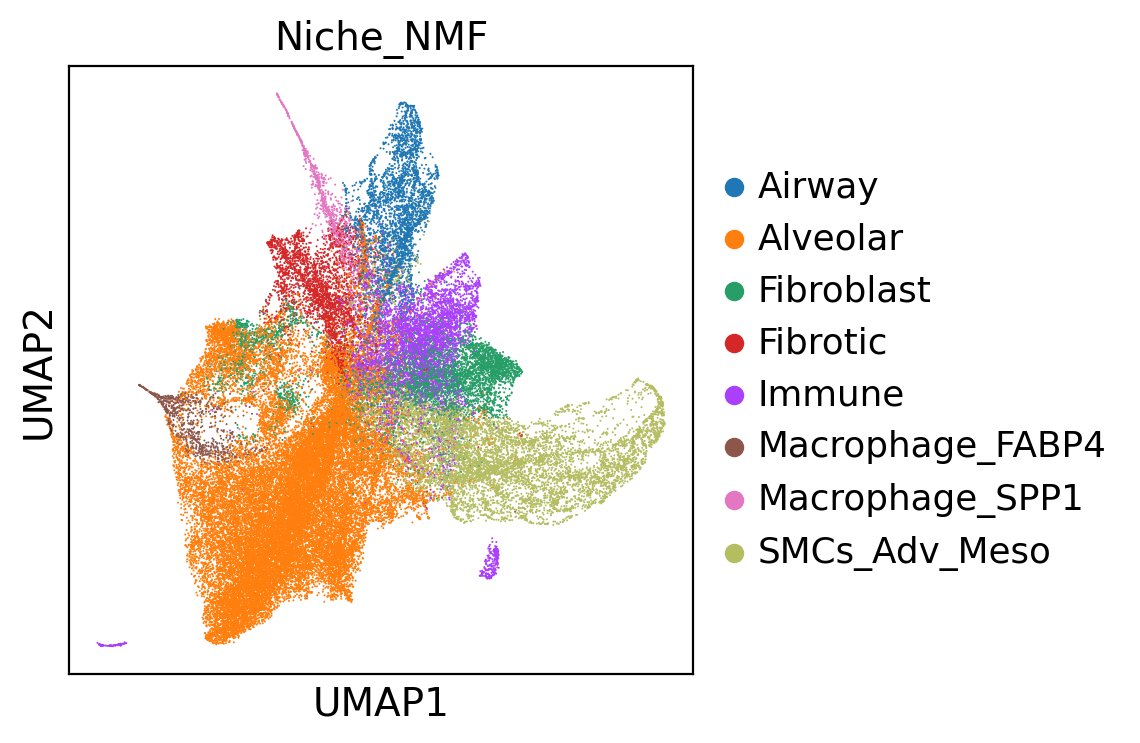

In [18]:
sc.pl.umap(adata_vis, color="Niche_NMF", palette=Niche_NMF_palette,)

# remove unnecessary columns from the object

In [19]:
adata_vis

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'n_genes', 'leiden', 'leiden_15', 'leiden_2', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', '_indices', '_scvi_batch', '_scvi_labels', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'S

In [21]:
adata_vis.obs

,in_tissue,array_row,array_col,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,...,mean_nUMI_factorsfact_9,mean_nUMI_factorsfact_10,mean_nUMI_factorsfact_11,mean_nUMI_factorsfact_12,OMG_gene,LILRB2_gene,spots,mapped_spots,Niche_NMF,patient
spot_id,,,,,,,,,,,,,,,,,,,,,
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1,1,50,102,90_A1_H237762_IPF_processed_CM,2869,7.962067,5180.0,8.552753,23.320463,28.629344,...,1.429611,0.224053,0.000000,0.088725,0.0,0.000000,90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1,mean_nUMI_factorsfact_3,Fibroblast,Donor_IPF_1
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1,1,59,19,90_A1_H237762_IPF_processed_CM,3827,8.250098,7457.0,8.917043,16.870055,22.287783,...,0.000000,0.000000,0.229103,0.000000,0.0,0.000000,90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1,mean_nUMI_factorsfact_1,Alveolar,Donor_IPF_1
90_A1_H237762_IPF_processed_CM_AAACAGCTTTCAGAAG-1,1,43,9,90_A1_H237762_IPF_processed_CM,3593,8.187021,7115.0,8.870101,16.837667,22.614195,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,90_A1_H237762_IPF_processed_CM_AAACAGCTTTCAGAAG-1,mean_nUMI_factorsfact_1,Alveolar,Donor_IPF_1
90_A1_H237762_IPF_processed_CM_AAACAGGGTCTATATT-1,1,47,13,90_A1_H237762_IPF_processed_CM,3108,8.042056,5879.0,8.679312,19.680218,25.514543,...,0.756844,0.000000,0.000000,0.000000,0.0,0.000000,90_A1_H237762_IPF_processed_CM_AAACAGGGTCTATATT-1,mean_nUMI_factorsfact_0,SMCs_Adv_Meso,Donor_IPF_1
90_A1_H237762_IPF_processed_CM_AAACATTTCCCGGATT-1,1,61,97,90_A1_H237762_IPF_processed_CM,1341,7.201916,1925.0,7.563200,21.558442,28.519481,...,1.728636,0.000000,0.000000,0.000000,0.0,0.000000,90_A1_H237762_IPF_processed_CM_AAACATTTCCCGGATT-1,mean_nUMI_factorsfact_3,Fibroblast,Donor_IPF_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217_0004_processed_aligned_TGTTGGTGAGCGGACG-1,1,59,17,1217_0004_processed_aligned,2068,7.634821,2816.0,7.943428,15.092330,20.490057,...,0.000000,0.000000,0.112649,0.000000,0.0,0.000000,1217_0004_processed_aligned_TGTTGGTGAGCGGACG-1,mean_nUMI_factorsfact_1,Alveolar,Donor_Control_2
1217_0004_processed_aligned_TGTTGGTGCGCACGAG-1,1,24,108,1217_0004_processed_aligned,1041,6.948897,1220.0,7.107426,15.983607,22.868852,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1217_0004_processed_aligned_TGTTGGTGCGCACGAG-1,mean_nUMI_factorsfact_1,Alveolar,Donor_Control_2
1217_0004_processed_aligned_TGTTGGTGCGCTTCGC-1,1,37,127,1217_0004_processed_aligned,2370,7.771067,3164.0,8.059908,13.305942,18.046776,...,0.042715,0.000000,0.000000,0.000000,0.0,2.054472,1217_0004_processed_aligned_TGTTGGTGCGCTTCGC-1,mean_nUMI_factorsfact_1,Alveolar,Donor_Control_2


In [ ]:
adata_vis.obs['sampleID'] = adata_vis.obs['donor'].astype(str) + '_' + adata_vis.obs['diagnosis'].astype(str)

In [33]:
obs_to_keep = ["in_tissue", 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
           'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology','patient',
           'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS',
           'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_factorsfact_0', 'mean_nUMI_factorsfact_1', 'mean_nUMI_factorsfact_2', 'mean_nUMI_factorsfact_3', 'mean_nUMI_factorsfact_4', 'mean_nUMI_factorsfact_5', 'mean_nUMI_factorsfact_6', 'mean_nUMI_factorsfact_7', 'mean_nUMI_factorsfact_8', 'mean_nUMI_factorsfact_9',
           'Niche_NMF']


In [34]:
var_to_keep = ['feature_types', 'genome', 'SYMBOL','n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'ENSEMBL']

In [32]:
adata_vis.X = adata_vis.layers["log1p"].copy()

In [35]:
adata_vis.obs = adata_vis.obs.loc[:, obs_to_keep].copy()
adata_vis.var = adata_vis.var.loc[:, var_to_keep].copy()
adata_vis

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', 'patient', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS', 'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_fa

In [36]:
del adata_vis.layers["log1p"]

In [37]:
del adata_vis.layers["total_normalized"]

In [38]:
adata_vis

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', 'patient', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS', 'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_fa

In [39]:
del adata_vis.uns["dendrogram_mapped_spots"]

In [40]:
del adata_vis.uns["leiden"]

In [41]:
del adata_vis.uns["leiden_15_colors"]

In [42]:
del adata_vis.uns["region_cluster_15_colors"]

In [43]:
del adata_vis.uns["leiden_2_colors"]

In [44]:
del adata_vis.uns["leiden_colors"]

In [45]:
del adata_vis.uns["region_cluster_1_colors"]

In [46]:
del adata_vis.uns["mapped_spots_colors"]

In [47]:
del adata_vis.uns["mod_coloc_n_fact10"]

In [48]:
del adata_vis.uns["mod_coloc_n_fact11"]

In [49]:
del adata_vis.uns["mod_coloc_n_fact13"]

In [50]:
del adata_vis.uns["mod_coloc_n_fact9"]

In [51]:
adata_vis

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', 'patient', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS', 'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_fa

In [52]:
del adata_vis.uns["rank_genes_groups"]

In [53]:
adata_vis

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', 'patient', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS', 'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_fa

In [54]:
##save
adata_vis.write(f"adata_vis_human_spatial_paper.h5ad")

In [14]:
##save
adata_vis= sc.read(f"adata_vis_human_spatial_paper.h5ad")

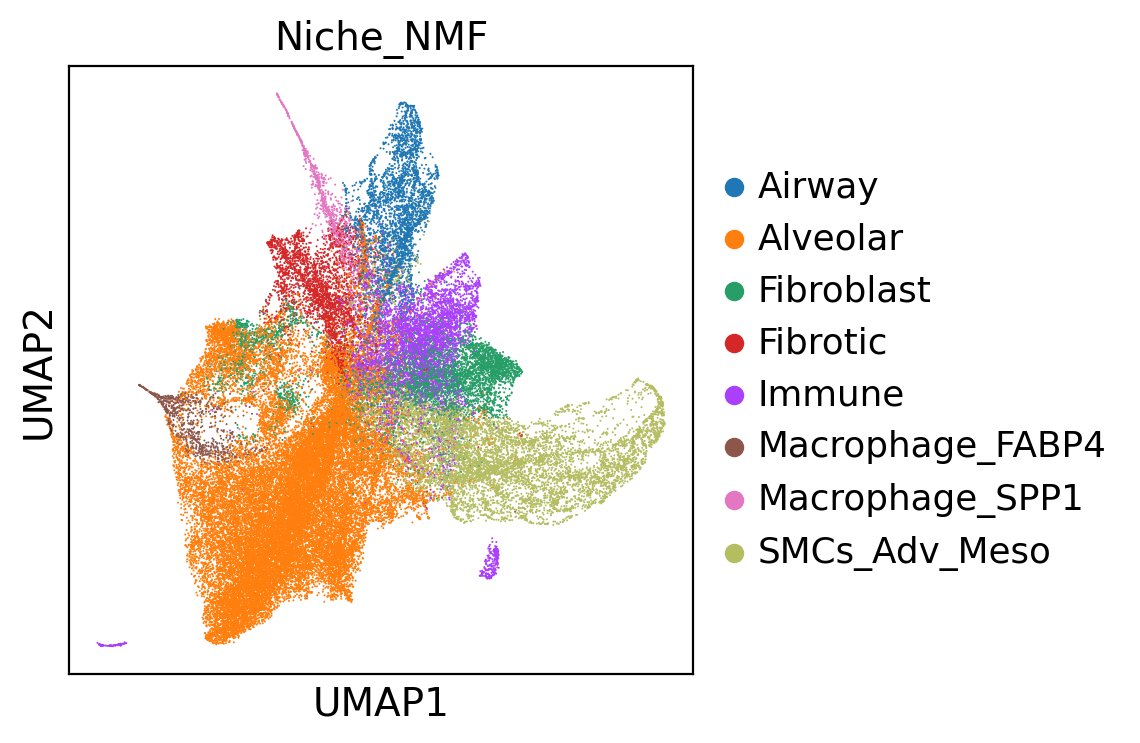

In [15]:
sc.pl.umap(adata_vis, color= ["Niche_NMF",], wspace=0.55)

In [16]:
# get dicrionary
dict([(x,x) for x in adata_vis.obs.Niche_NMF.cat.categories])

{'Airway': 'Airway',
 'Alveolar': 'Alveolar',
 'Fibroblast': 'Fibroblast',
 'Fibrotic': 'Fibrotic',
 'Immune': 'Immune',
 'Macrophage_FABP4': 'Macrophage_FABP4',
 'Macrophage_SPP1': 'Macrophage_SPP1',
 'SMCs_Adv_Meso': 'SMCs_Adv_Meso'}

In [17]:
cell_mapping_dict = {'Airway': 'Airway',
 'Alveolar': 'Alveolar',
 'Fibroblast': 'Fibroblast',
 'Fibrotic': 'Fibrotic',
 'Immune': 'Immune',
 'Macrophage_FABP4': 'Alveolar Macrophage',
 'Macrophage_SPP1': 'Airway Macrophage',
 'SMCs_Adv_Meso': 'SMCs_Adv_Meso'}

In [18]:
adata_vis.obs['Niche_NMF'] = adata_vis.obs.Niche_NMF.map(cell_mapping_dict).astype('category')

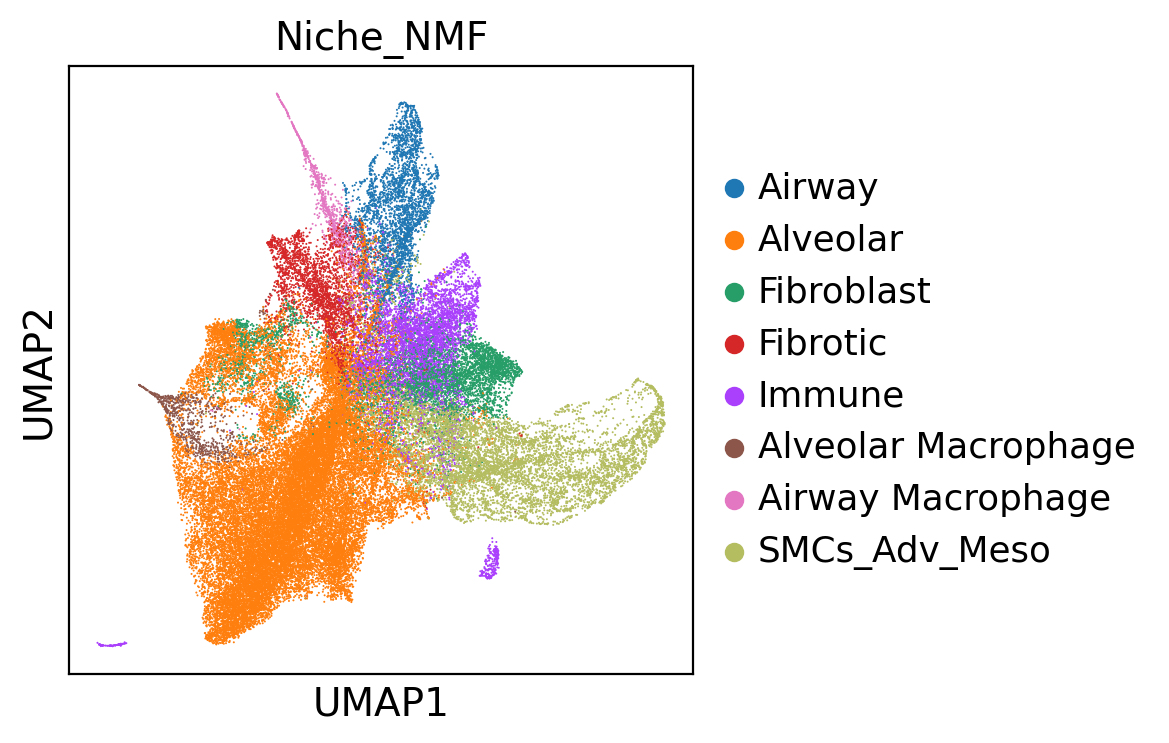

In [19]:
sc.pl.umap(adata_vis, color= ["Niche_NMF",], wspace=0.55)

In [20]:
##save
adata_vis.write(f"adata_vis_human_spatial_paper.h5ad")

In [ ]:
adata_vis.obs.rename(columns = {"name": "sample_ID", "grouping": "condition", "lineage": "lineage_label",
                            "pbs_cell_type": "cell_type_pbs", "percent.mito": "percent_mito"}, inplace = True)

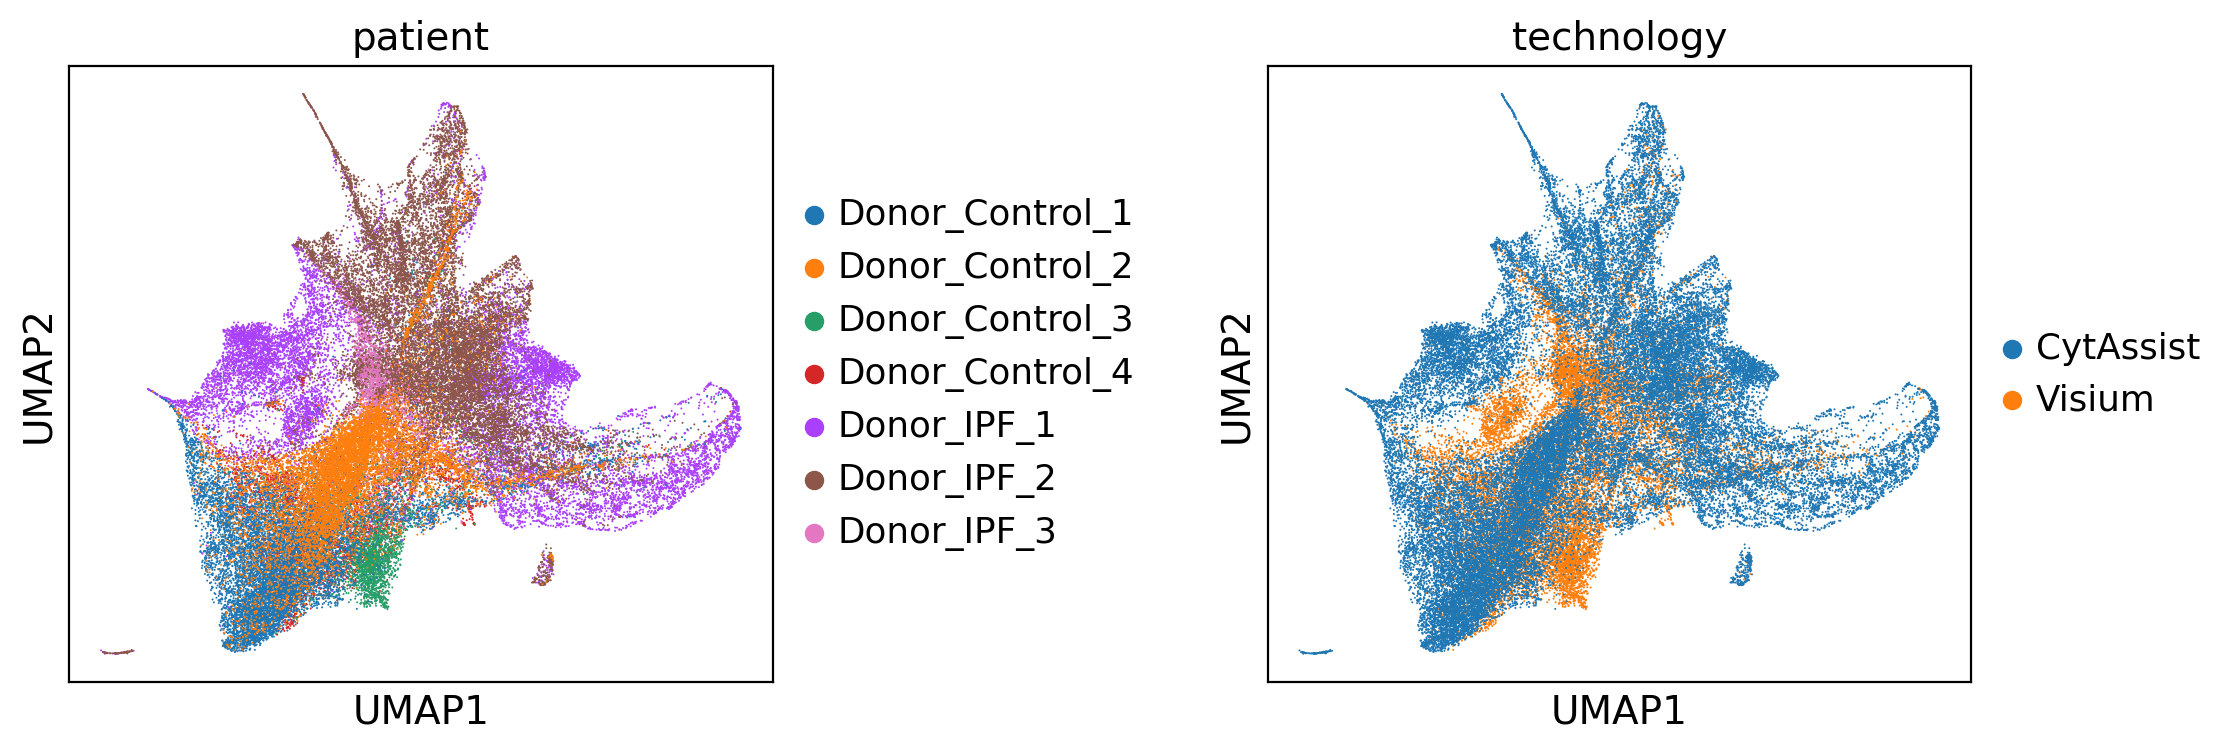

In [27]:
sc.pl.umap(adata_vis, color= ["patient","technology"], wspace=0.55)

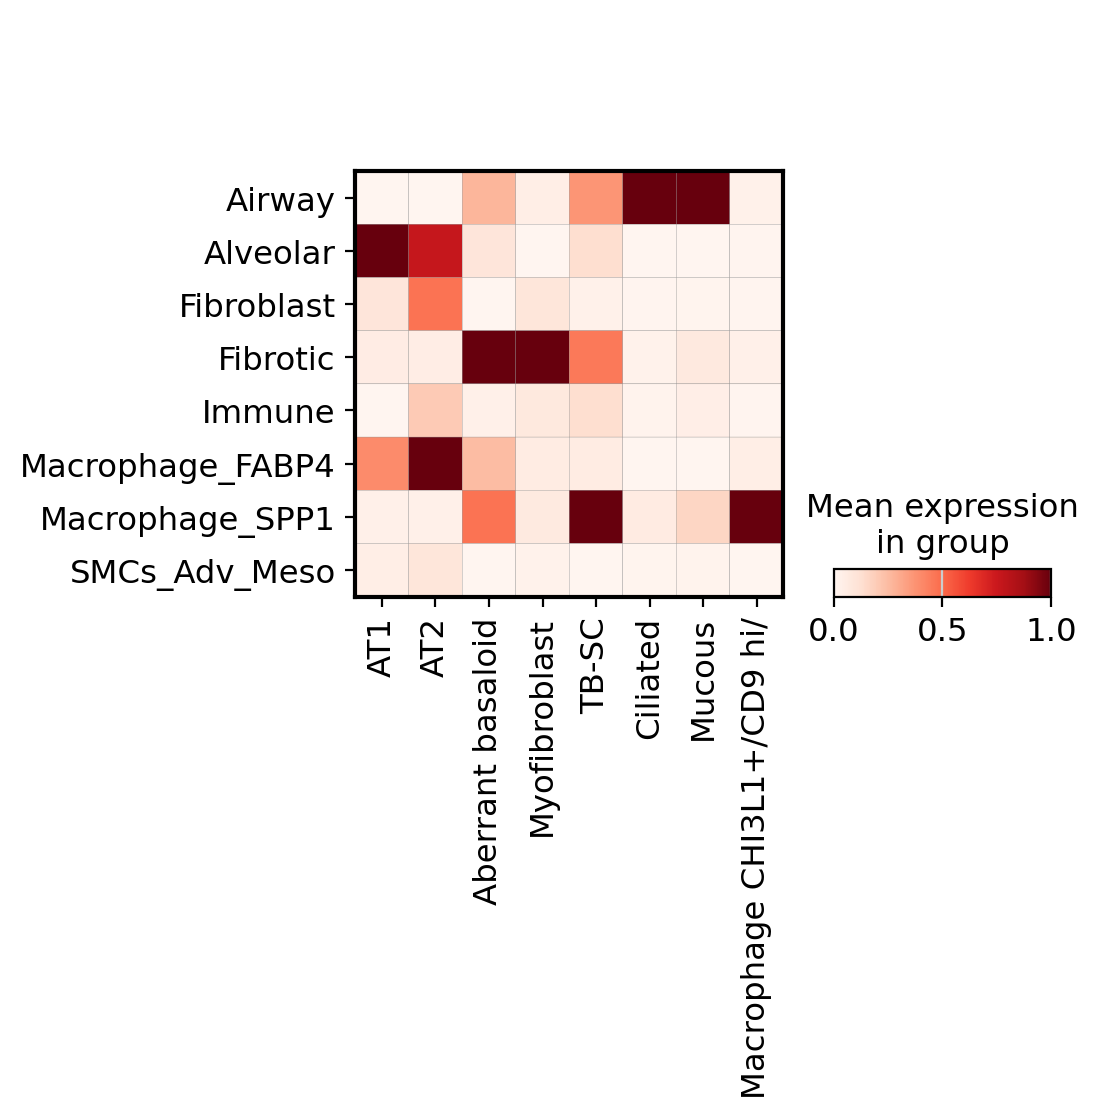

In [70]:
sc.pl.matrixplot(adata_vis, var_names= ["AT1","AT2","Aberrant basaloid","Myofibroblast","TB-SC","Ciliated","Mucous",'Macrophage CHI3L1+/CD9 hi/'], groupby=["Niche_NMF"],
                 layer="log1p", vmin=0,standard_scale="var", cmap=mymap)